<a href="https://colab.research.google.com/github/0xmennatullah/PyTorch/blob/main/ch1_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1

In [72]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [73]:
import torch
torch.cuda.is_available()

False

In [74]:
device= "cuda" if torch.cuda.is_available() else "cpu"

## putting tensors and models on GPU
- cuz using GPU results in faster communications

In [75]:
#create a tensor (def on cpu)
tensor = torch.tensor([1,2,3])

#not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [76]:
#movee to gpu
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3])

### moving tensors back to cpu
- numpy only work on the cpu, so we might need to refer back

In [77]:
# if on gpu -> can't trans to numpy
tensor_on_gpu.numpy()

array([1, 2, 3])

In [78]:
# to fix the gpu tensor + numpy issue, we first set it to cpu
tensor_to_cpu = tensor_on_gpu.cpu().numpy()
tensor_to_cpu

array([1, 2, 3])

In [79]:
tensor_on_gpu
# we assigned the change to tensor_on_cpu, so on_gpu didn't change

tensor([1, 2, 3])

In [80]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting model to data",
                      4: "making predictions (inference)",
                      5: "saving and loading the model",
                      6: "bringing it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting model to data',
 4: 'making predictions (inference)',
 5: 'saving and loading the model',
 6: 'bringing it all together'}

In [81]:
import torch
from torch import nn #basic building blocks for a graph aka neural net.
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

## 1. data (preparing and loading)
 - can be almost ANYTHING => excel sheet, vidios, audio, photo, etc, DNA, txt
 - ML is a game => get data into neumericals + build model t learn patterns in this representation
 - same goes for DL => u need some numberic representation
 -using the linear regression formula t make straight line w known *parameters* => (sth model learns)

In [82]:
# create known parameteres

weight = 0.8
bias = 0.2

# create data

start = 0
end = 1
step= 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight *X + bias

X[:10], Y[:10] #why not x[:, 10]?

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640],
         [0.2800],
         [0.2960],
         [0.3120],
         [0.3280],
         [0.3440]]))

In [83]:
len(X), len(Y)

(50, 50)

In [84]:
#splitting our data set => train test
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)
#can use sckikit to randomly split itttt

(40, 40, 10, 10)

In [85]:
X_train, Y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640],
         [0.2800],
         [0.2960],
         [0.3120],
         [0.3280],
         [0.3440],
         [0.3600],
         [0.3760],
         [

how to better visualize our data?
-> data explorer's motto => VISUALIZEEEE

In [86]:
def plot_prediction(train_data= X_train,
                    train_labels = Y_train,
                    test_data = X_test,
                    test_labels = Y_test,
                    predictions = None):

  plt.figure(figsize = (10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label = "training data")

  #plot test data
  plt.scatter(test_data, test_labels, c="r", s=4, label = "testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "g", label = "predictions")


  #show the legend
  plt.legend(prop = {"size":14})

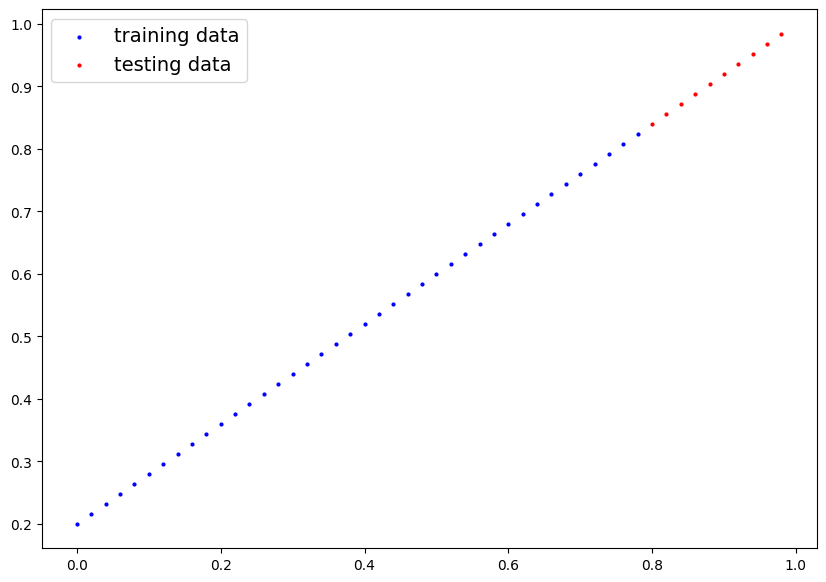

In [87]:
plot_prediction();

### building a model

what our model does:
- start w random values
- look @training data
- adjast rv to get closer to ideal values (weight n bias values we used t create the data)

how?
 - gradient decient
 - back probagation

In [88]:
#create linear regression model
from torch import nn
class LinearRegressionModel(nn.Module): #nn.module = almost everything's father in pytorch
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # changed from randint to randn
                                              requires_grad = True, #requires gradient
                                              dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, # changed from randint to randn
                                          requires_grad = True,
                                          dtype = torch.float))
  #forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor: #x=>inout data
    return self.weights * x + self.bias

      #should update this method to suit ur model

### pytorch model building essentials
- torch.nn: all building blocks/computaional graphs(nn)
- nn can be considered as computational graph
- torch.nn.Parameter: parameters our model should learn
- torch.nn.module: base class for all nn modules => if sub classed => u should overwrite the forward method
- torch.optim => helps with gradient decent
- def forward() -> all nn subs REQUIRE TO OVERWRITE THIS METH


### checking the content of our pytorch model
- check parameters => using .Parameters

In [89]:
# create a random seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegressionModel()

# check parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [90]:
#list named parameters
model_0.state_dict()
#dictionary of the parameters names

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [91]:
weight, bias

(0.8, 0.2)

### making predictions using torch.inference_mode

- to check out model's productive power, let's see how well it predicts y for each x
- passing data to model => run it throught forward function



In [92]:
#make oredictions

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds
# doesn't keep track of gradient values or any values really to improve our model, it just makes predictions which make it a lot faster
#we can do the same using torch.no_grad(), but inference model is preferred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

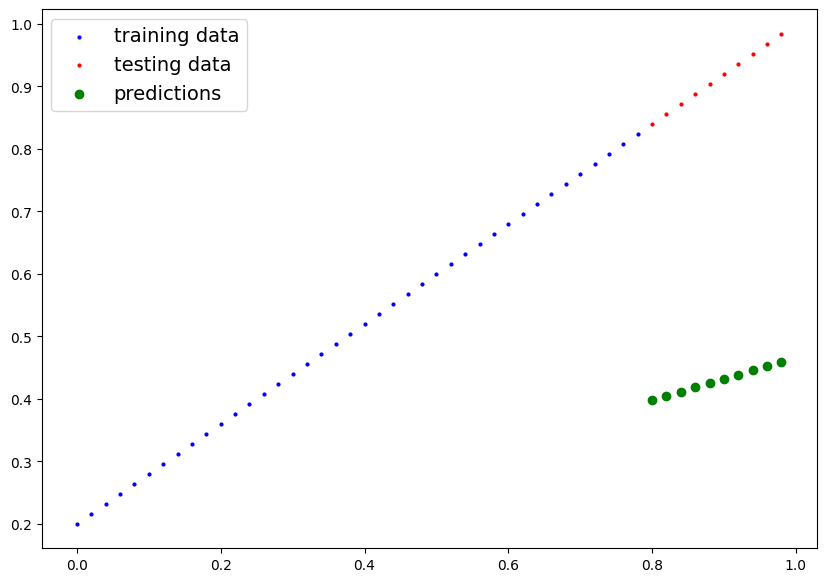

In [93]:
plot_prediction(predictions = y_preds)

## 3. train model
- training: model move from some unknown parameters(random) to known ones
                        from poor representation of data to better one

- one way to measure how poor ur representation is => using loss function
- cost function: loss function / criterion

things we need to try:

**loss function:** function to measure how wrong ur model predictions to the real data**optemizer:** takes into account loss functions & adjuct model's parameters to improve the loss function

specifically in pytorch we might need:
- trainning loop
- testing loop



loss functions
  - L1loss=> Mean absolute error
  - MSEloss => L2
  - cross entropy loss


In [94]:
model_0.parameters()

<generator object Module.parameters at 0x7deed1d10ba0>

In [95]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [96]:
#set up a loss function
loss_fn = nn.L1Loss()

#setup optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01, #learning rate

                            )

In [97]:
loss_fn

L1Loss()

### building a trainingn loop (and testing) in pytorch

0. loop through data
1. forward pass(propagation) (data moving through model's `forward()` function) to make predictions on data
2. calculate the loss (compare forward pass prediiction to grounf truth labels)
3. optimizer zero grad
4. loss backward(back probagation) - move backwards through the network to calculate the gradients of each of parameters of model w respect to the loss
5. optimizer step: use optim to adjust our model's parameter to try improve the loss (gradient descent)

In [98]:
torch.manual_seed(55)
# an epoch is one loop through the data
epochs = 1000 #hyper parameter cuz we set it ourselves

# track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. loop throught the data
for epoch in range(epochs):
  # set model to train mode
  model_0.train() #train mode sets all parameters that require gradient to => require gradient

  #1. forward pass
  Y_pred = model_0(X_train)

  #2. calculate the loss
  loss = loss_fn(Y_pred, Y_train)
  #3. optim zero grad
  optimizer.zero_grad()

  #4. perform back probagation on the loss
  loss.backward()

  #5. step the optimizer
  optimizer.step()

# testing code
  model_0.eval() #turns off gradient decent
  with torch.inference_mode(): #turns off gradient tracking &couple more things
    # 1. forward pass
    test_pred = model_0(X_test)

    #2. calc the loss
    test_loss = loss_fn(test_pred, Y_test)
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy()) # Append scalar loss value
    test_loss_values.append(test_loss.detach().numpy()) # Append scalar test loss value
    print(f"epoch: {epoch} | loss: {loss} | loss: {test_loss}")
    print(model_0.state_dict())

epoch: 0 | loss: 0.25188133120536804 | loss: 0.470065176486969
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch: 10 | loss: 0.14190271496772766 | loss: 0.33994418382644653
OrderedDict([('weights', tensor([0.3795])), ('bias', tensor([0.2343]))])
epoch: 20 | loss: 0.09042375534772873 | loss: 0.2502245604991913
OrderedDict([('weights', tensor([0.4151])), ('bias', tensor([0.2923]))])
epoch: 30 | loss: 0.07359591871500015 | loss: 0.19869937002658844
OrderedDict([('weights', tensor([0.4438])), ('bias', tensor([0.3183]))])
epoch: 40 | loss: 0.06710202991962433 | loss: 0.1696048378944397
OrderedDict([('weights', tensor([0.4670])), ('bias', tensor([0.3268]))])
epoch: 50 | loss: 0.06304941326379776 | loss: 0.152482807636261
OrderedDict([('weights', tensor([0.4868])), ('bias', tensor([0.3263]))])
epoch: 60 | loss: 0.059559416025877 | loss: 0.14146271347999573
OrderedDict([('weights', tensor([0.5048])), ('bias', tensor([0.3213]))])
epoch: 70 | loss: 0.0560694150626659

In [99]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7990])), ('bias', tensor([0.2093]))])

In [100]:
with torch.inference_mode():
  Y_preds_new = model_0(X_test)

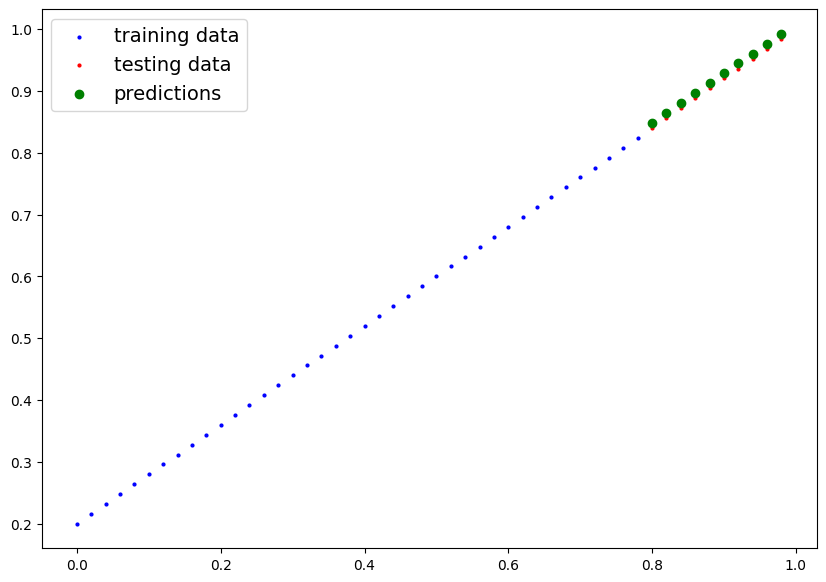

In [101]:
plot_prediction(predictions = Y_preds_new);

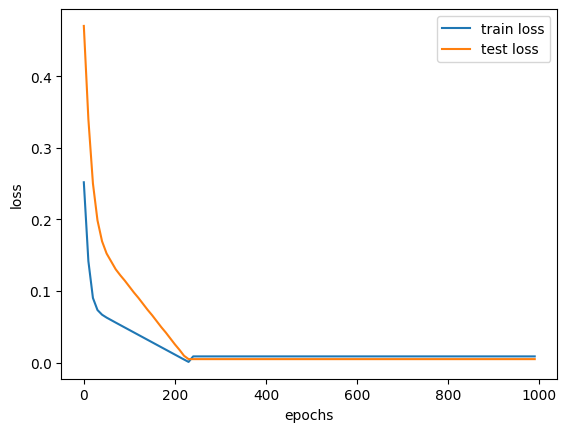

In [102]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(epoch_count, np.array(loss_values), label = "train loss")
plt.plot(epoch_count, np.array(test_loss_values), label = "test loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();

### saving a model in pytorch


1. `torch.save()`: allows u to save pytorch obj in python's pickle format
2. `torch.load()`: load saved pytorch obj
3. `torch.nn.load_state_dict()`: saved state dictionary


In [103]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7990])), ('bias', tensor([0.2093]))])

In [104]:
from pathlib import Path
# 1. create model dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

#2. create model save path(name)
MODEL_NAME = "ava_V0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#3. save the model state
torch.save(obj= model_0.state_dict(),
           f = MODEL_SAVE_PATH)


In [105]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1490 Jul  8 21:26 ava_V0.pth


In [106]:
## loading pytorch model
model_0.state_dict()

OrderedDict([('weights', tensor([0.7990])), ('bias', tensor([0.2093]))])

In [107]:
#to load it, we gotta instanciate new instance of our model class
loaded_ava0 = LinearRegressionModel()

loaded_ava0.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

<All keys matched successfully>

In [108]:
loaded_ava0.state_dict()

OrderedDict([('weights', tensor([0.7990])), ('bias', tensor([0.2093]))])

In [109]:
#make some predictions as test
loaded_ava0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_ava0(X_test)

loaded_model_preds

tensor([[0.8485],
        [0.8645],
        [0.8804],
        [0.8964],
        [0.9124],
        [0.9284],
        [0.9443],
        [0.9603],
        [0.9763],
        [0.9923]])

In [110]:
# compare oreds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [111]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8485],
        [0.8645],
        [0.8804],
        [0.8964],
        [0.9124],
        [0.9284],
        [0.9443],
        [0.9603],
        [0.9763],
        [0.9923]])

# Phase 2

## getting it all together!

- going back through the steps above!



### 6.1 data

In [112]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [113]:
#known parameters
weight = 0.9
bias = 0.1

# data

start = 0
end = 1
step = 0.03

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = (weight * X + bias)

In [114]:
#splitting data
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [115]:
def plot_predictions( train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = None):
  plt.figure(figsize=(10,10))

  plt.scatter(train_data, train_labels, c="b", s=4, label ="training data")
  plt.scatter(test_data, test_labels, c="r", s=4, label = "test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="g", s=4, label = "predictions")

  plt.legend(prop={"size": 14});

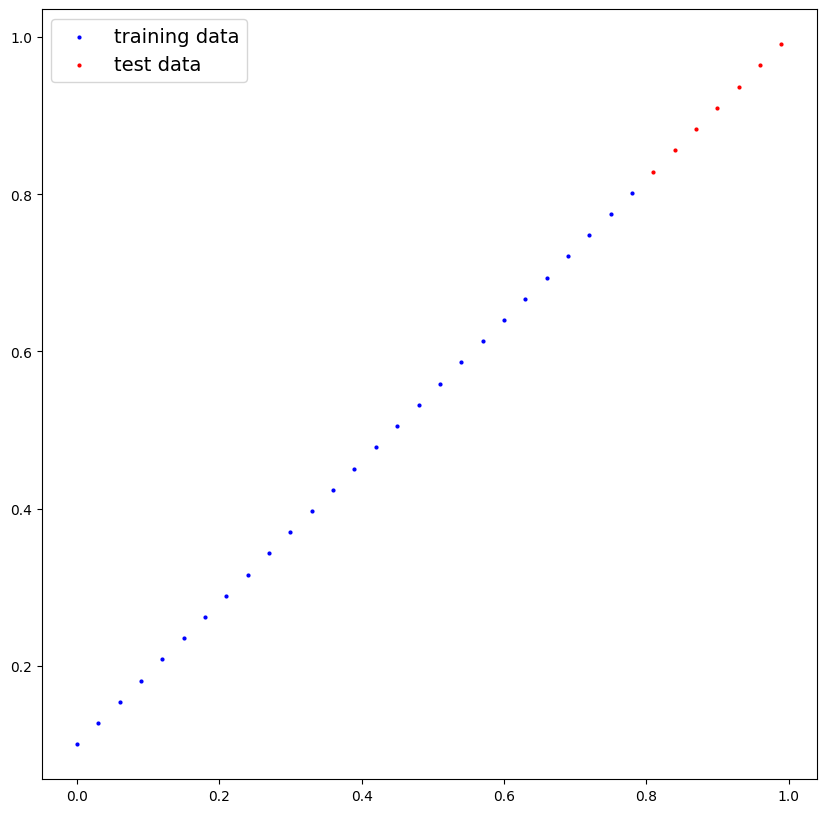

In [116]:
plot_predictions()

### 6.2 build model

In [117]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

  torch.manual_seed(44)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.4392]])),
              ('linear_layer.bias', tensor([0.4614]))]))

In [118]:
next(model_1.parameters()).device

device(type='cpu')

In [119]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using deviced: {device}")

using deviced: cpu


In [120]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

In [121]:
#to make training loop and testing loop => we'll need optimizer and loss function

loss_fn1 = nn.L1Loss()
optimizer1 = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)


In [127]:
torch.manual_seed(44)

epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  y_pred = model_1(X_train)
  loss = loss_fn1(y_pred, y_train)
  optimizer1.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch %100 == 0:
    print(f"epoch: {epoch} | train loss: {loss} | test loss: {test_loss}")

epoch: 0 | train loss: 0.18163420259952545 | test loss: 0.05338358134031296
epoch: 100 | train loss: 0.18163420259952545 | test loss: 0.05338358134031296
epoch: 200 | train loss: 0.18163420259952545 | test loss: 0.05338358134031296
epoch: 300 | train loss: 0.18163420259952545 | test loss: 0.05338358134031296
epoch: 400 | train loss: 0.18163420259952545 | test loss: 0.05338358134031296
epoch: 500 | train loss: 0.18163420259952545 | test loss: 0.05338358134031296
epoch: 600 | train loss: 0.18163420259952545 | test loss: 0.05338358134031296
epoch: 700 | train loss: 0.18163420259952545 | test loss: 0.05338358134031296
epoch: 800 | train loss: 0.18163420259952545 | test loss: 0.05338358134031296
epoch: 900 | train loss: 0.18163420259952545 | test loss: 0.05338358134031296


In [128]:
from pprint import pprint
pprint(model_1.state_dict())
print(f" weight: {weight}, bias: {bias}")

OrderedDict([('linear_layer.weight', tensor([[0.4392]])),
             ('linear_layer.bias', tensor([0.4614]))])
 weight: 0.9, bias: 0.1


### 6.4 making predictions

In [129]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8171],
        [0.8303],
        [0.8434],
        [0.8566],
        [0.8698],
        [0.8830],
        [0.8961]])

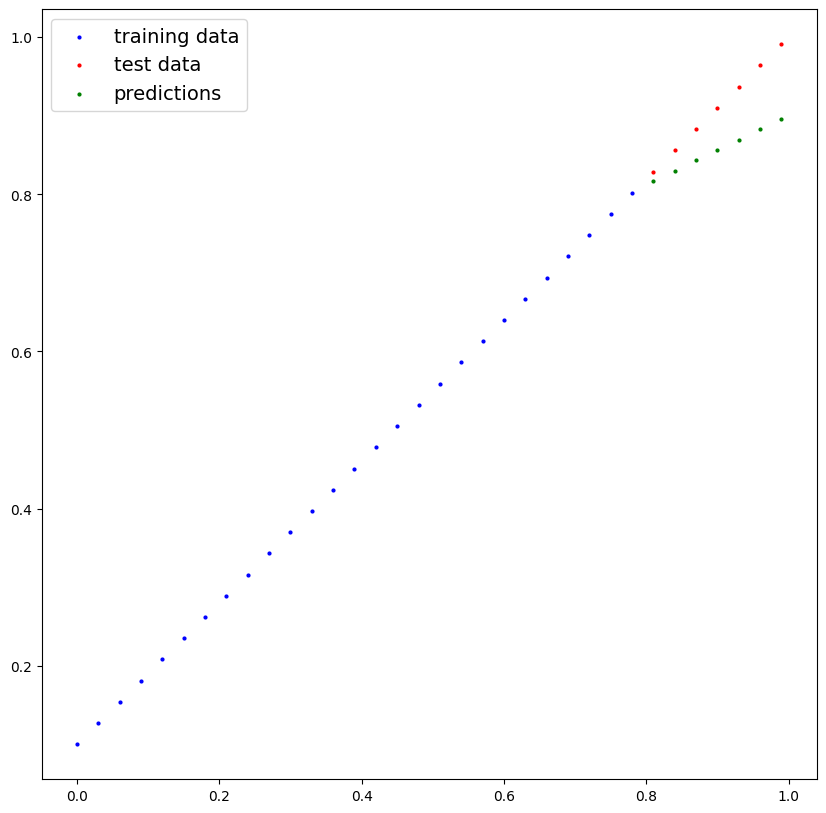

In [130]:
plot_predictions(predictions = y_preds.cpu())

### 6.5 saving & loading models

In [131]:
from pathlib import Path

# creating dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# creating save path
MODEL_NAME = "ava_V1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#saving state dict
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)

In [134]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

print(f"loaded model:\n{loaded_model_1}")
print(f"model on device:\n{next(loaded_model_1.parameters()).device}")

loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
model on device:
cpu


In [138]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model_1(X_test)

y_preds == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])